## Importing libraries

In [1]:
import yfinance as yf

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import json
import datetime as dt

## Loading the dataframe with the subset of the NEX index

In [2]:
nex = pd.read_csv('./Finance_Data/NEX_stocks.csv', index_col=0)

symbols = nex['symbol'].values

df = yf.download(" ".join(symbols), interval='1d', groupby='ticker')['Close']
df = np.round(df, 2)

[*********************100%***********************]  37 of 37 completed


## Selecting timeframe being researched

In [3]:
df = df.loc['2000-01-01':'2019-12-31']

In [4]:
# Remove dates without any price information
df = df[df.sum(axis=1) != 0]

## Weighting companies

In [5]:
N = symbols.size
weights = []
for i, _ in df.iterrows():
    w = df.loc[i][df.loc[i] > 0].size / N
    weights.append(w)
    
df['weight'] = weights

## Computing 90 day Exponential Moving Average

In [6]:
S = df.sum(axis=1)
S *= df['weight']
S = S.ewm(span=90, adjust=False).mean()

## Visualizing 90 day EMA

<AxesSubplot:xlabel='Date'>

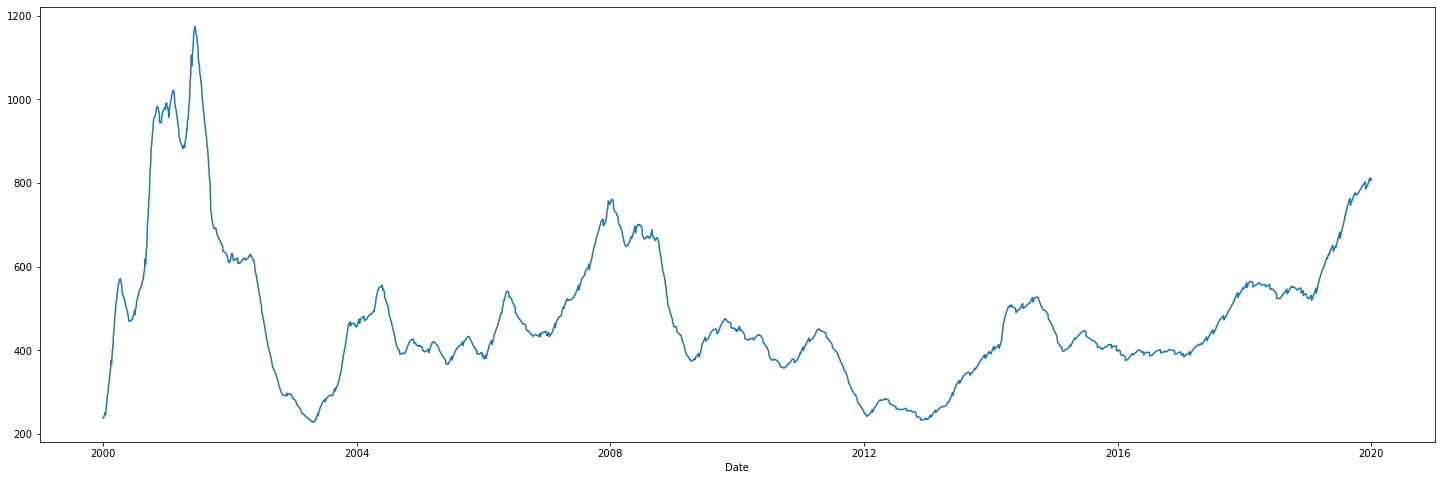

In [7]:
plt.figure(figsize=(25, 8))
sns.lineplot(x=df.index, y=S)

## Loading and visualizing the full NEX index

<AxesSubplot:xlabel='Date', ylabel='Close'>

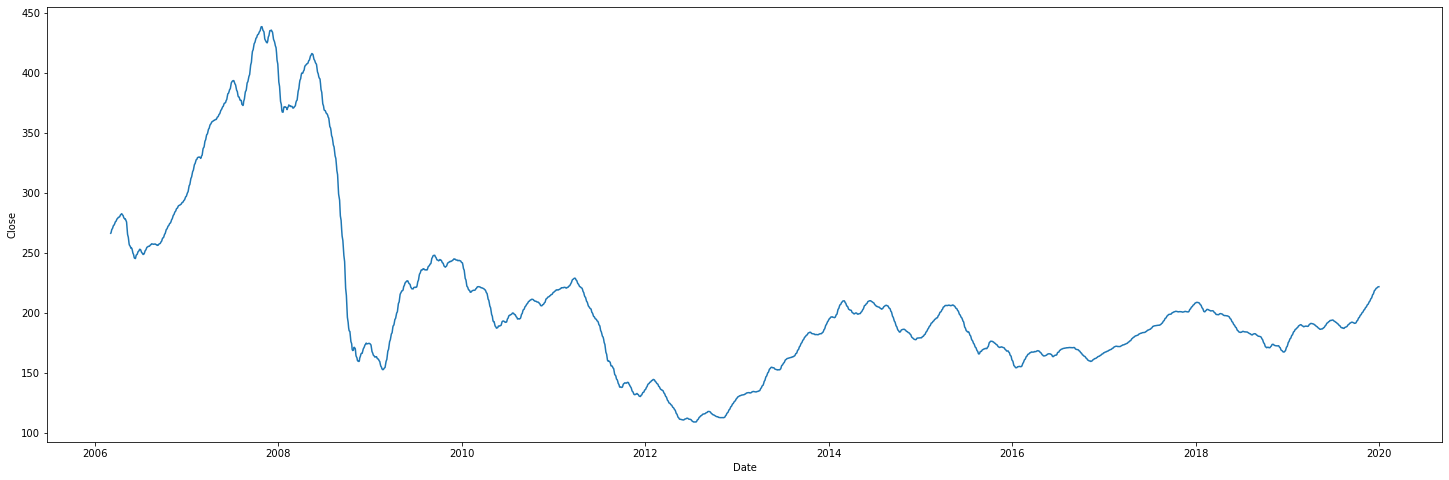

In [8]:
nx = pd.read_excel('./Finance_Data/NEX_full_prices.xlsx', header=1)
nx['Close'] = nx['Close'].ewm(span=30, adjust=False).mean()
plt.figure(figsize=(25, 8))
sns.lineplot(x='Date', y='Close', data=nx)

In [13]:
df.to_csv('./Finance_Data/NEX_subset_prices')